In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

First let's create a fake dataset. The features will consist of one real number from 0 to 10 for each input.

In [2]:
X = np.arange(0., 10., 0.05).reshape(-1, 1)
print(f'features shape: {X.shape}')
print(X[:10])

features shape: (200, 1)
[[0.  ]
 [0.05]
 [0.1 ]
 [0.15]
 [0.2 ]
 [0.25]
 [0.3 ]
 [0.35]
 [0.4 ]
 [0.45]]


We will also create a target (what we want the model to learn to predict) by computing a linear function `y = ax + b` and adding some noise.

In [3]:
a            = 3.5
b            = -1.4
noise_vector = np.random.normal(0, 5, X.shape[0])
y            = a * X[:, 0] + noise_vector + b
y.shape

(200,)

Let's visualize our dataset and the line we used to create the targets.

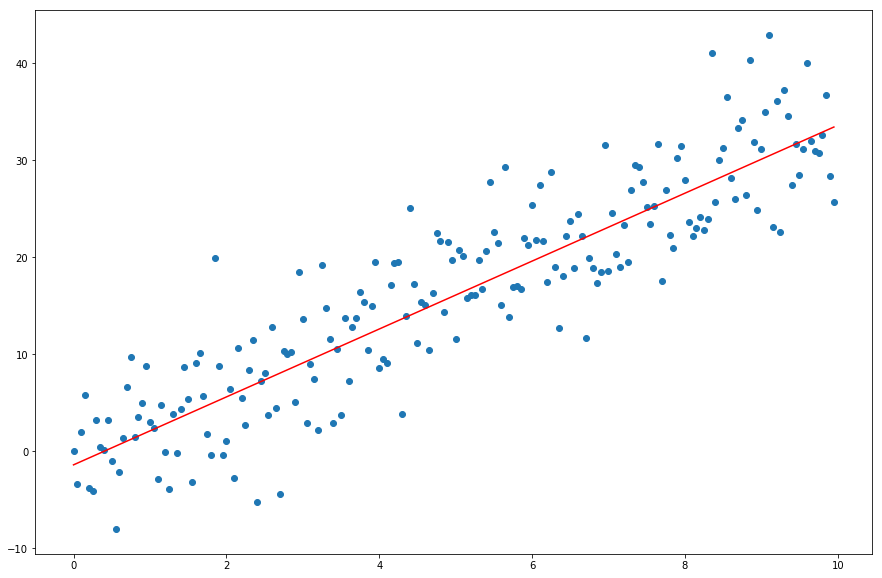

In [4]:
plt.figure(figsize = (15, 10))
plt.scatter(X, y)
plt.plot(X, a * X + b, color = 'red')

Now that we have our dataset, we can create a `LinearRegression` model that will analyse the data and extract a trend as a line. After creating the model, we have to `fit` it to our data, this is where the "learning" or "training" happens.

In [5]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's look at the line coefficient and intercept learned by the model.

In [6]:
model.coef_, model.intercept_

(array([3.50369374]), -1.0460486774665547)

Let's plot the model guess (in cyan) alongside the line that we used to generate the data (in red).

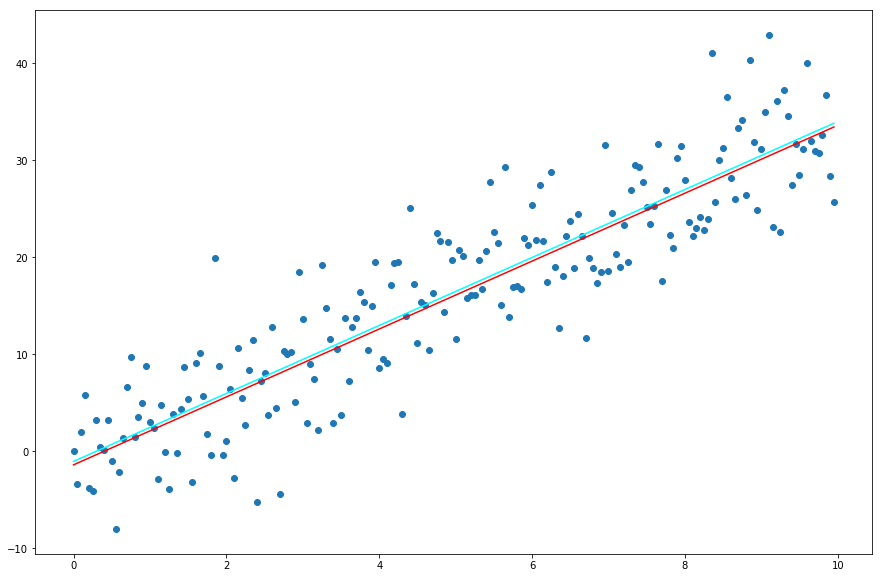

In [9]:
plt.figure(figsize = (15, 10))
plt.scatter(X, y)
plt.plot(X, a * X + b, color = 'red')
plt.plot(X, model.predict(X), color = 'cyan')

We can now ask ourselves how good is the model at understanding our data. Let's compute the average difference between the prediction of the model and the real target for each sample of the dataset.

In [12]:
mean_absolute_error(y, model.predict(X))

3.9580886867272884

Let's compare this value with the average amount of noise that we have added during the creation of the dataset.

In [15]:
np.abs(noise_vector).mean()

3.9726383503819704

As expected, the model is able to learn the "trend" of the data but not the noise.